<a href="https://colab.research.google.com/github/SallyPeter/gomycodeDSbootcamp/blob/main/ML/Machine_Learning_Algorithms_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What You're Aiming For**

In this checkpoint, we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods.

**Dataset description: **This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

➡️ Dataset link

https://i.imgur.com/hv2Ynyn.jpg

➡️ Columns explanation


**Instructions**

**Part1: supervised learning**

- Import you data and perform basic data exploration phase
  - Display general information about the dataset
  - Create a pandas profiling reports to gain insights into the dataset
  - Handle Missing and corrupted values
  - Remove duplicates, if they exist
  - Handle outliers, if they exist
  - Encode categorical features
- Prepare your dataset for the modelling phase
- Apply Decision tree, and plot its ROC curve
- Try to improve your model performance by changing the model hyperparameters

**Part2: unsupervised learning**

- Drop out the target variable
- Apply K means clustering and plot the clusters
- Find the optimal K parameter
- Interpret the results

## Import you data and perform basic data exploration phase

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [2]:
data = pd.read_csv('Microsoft_malware_dataset_min.csv')
data.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [4]:
data.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [5]:
data.Census_OSEdition.unique()

array(['Professional', 'Core', 'CoreSingleLanguage', 'EnterpriseS',
       'CoreCountrySpecific', 'EnterpriseSN', 'ProfessionalEducation',
       'Enterprise', 'Education', 'Cloud', 'ProfessionalN',
       'ServerStandard', 'CoreN', 'ServerStandardEval', 'EducationN',
       'ServerDatacenterEval', 'ProfessionalEducationN', 'ServerSolution',
       'EnterpriseN'], dtype=object)

In [6]:
data.CountryIdentifier.nunique()

221

In [7]:
le = LabelEncoder()
data.Census_OSEdition = le.fit_transform(data.Census_OSEdition)
data.OsPlatformSubRelease = le.fit_transform(data.OsPlatformSubRelease)

In [8]:
for each in data.columns:
  if each != 'CountryIdentifier':
    data[each] = data[each].fillna(data[each].mean())
  else:
    data[each] = data[each].fillna(data[each].mode())

# data.fillna(data.mode(), inplace=True)

data.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.499280,0.281607,0.006642,5.39227,0.075850,0.977326,0.000351,0.944864,3.529380,108.188050
std,0.500002,0.442038,0.081154,4.46651,0.264759,0.148060,0.018163,0.227799,1.356825,62.989406
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,3.000000,51.000000
50%,0.000000,0.000000,0.000000,4.00000,0.000000,1.000000,0.000000,1.000000,4.000000,97.000000
75%,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,1.000000,4.000000,162.000000
max,1.000000,1.000000,1.000000,18.00000,1.000000,1.000000,1.000000,1.000000,8.000000,222.000000


In [9]:
data.isna().sum()

,0
HasDetections,0
Wdft_IsGamer,0
Census_IsVirtualDevice,0
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,0
SMode,0
IsProtected,0
OsPlatformSubRelease,0
CountryIdentifier,0


## **Part 1: Supervised Learning**

In [10]:
x = data.drop("HasDetections", axis=1)
y = data['HasDetections']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [11]:
# Prepare your dataset for the modelling phase
dt = DecisionTreeClassifier()

In [12]:
# Apply Decision tree, and plot its ROC curve
dt.fit(x_train, y_train)
y_prob = dt.predict_proba(x_test)[:,1]

y_pred = []
for each in y_prob:
  if each >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


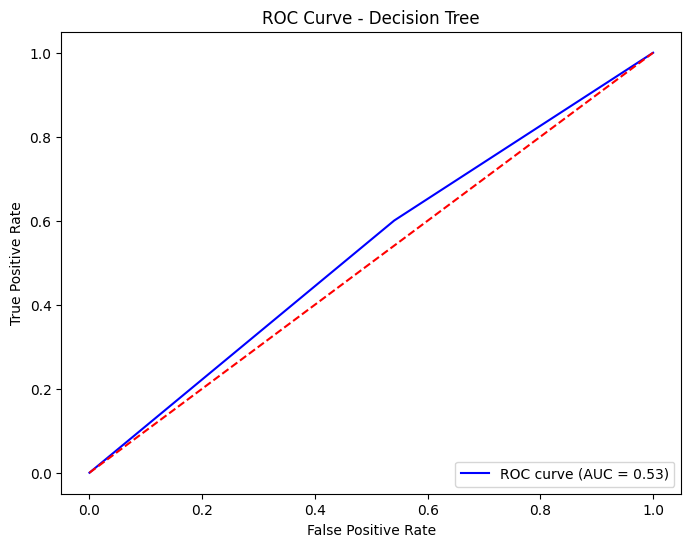

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Try to improve your model performance by changing the model hyperparameters

dt = DecisionTreeClassifier(criterion='entropy', max_depth= 5, random_state=20)

In [15]:
# Apply Decision tree, and plot its ROC curve
dt.fit(x_train, y_train)
y_prob = dt.predict_proba(x_test)[:,1]

y_pred = []
for each in y_prob:
  if each >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


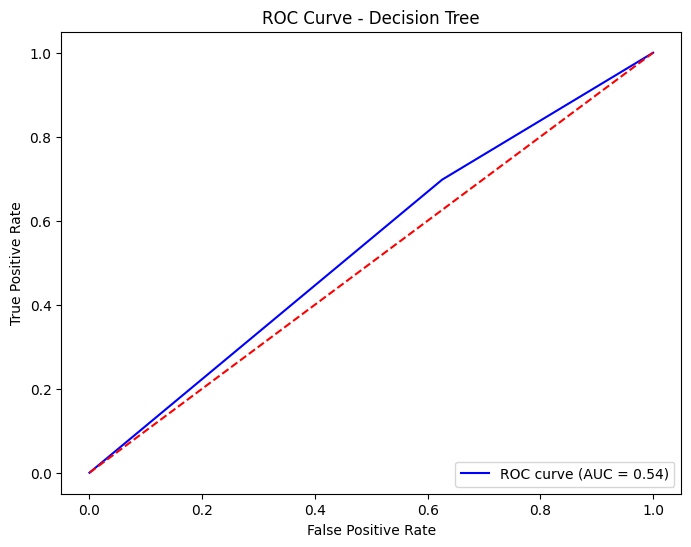

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

## **Part 2: Unsupervised Learning**

In [17]:
# Drop out the target variable
# This has been done in x and y already

In [18]:
# Apply K means clustering and plot the clusters
km = KMeans() #default n-clusters=8;

km.fit(x)

KMeans()

In [19]:
labels = km.labels_
centers = km.cluster_centers_

In [20]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

cluster_labels = km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


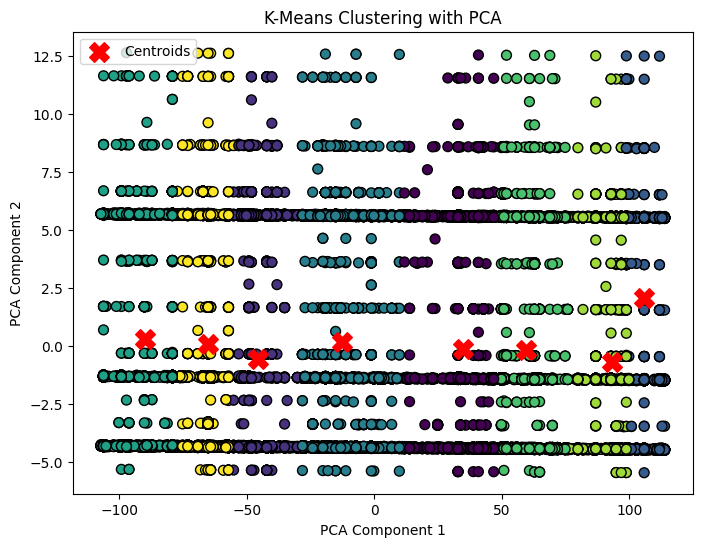

In [21]:
plt.figure(figsize=(8, 6))

# Scatter plot with PCA-reduced data
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plot the K-means centroids (after PCA transformation)
centroids_pca = pca.transform(km.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


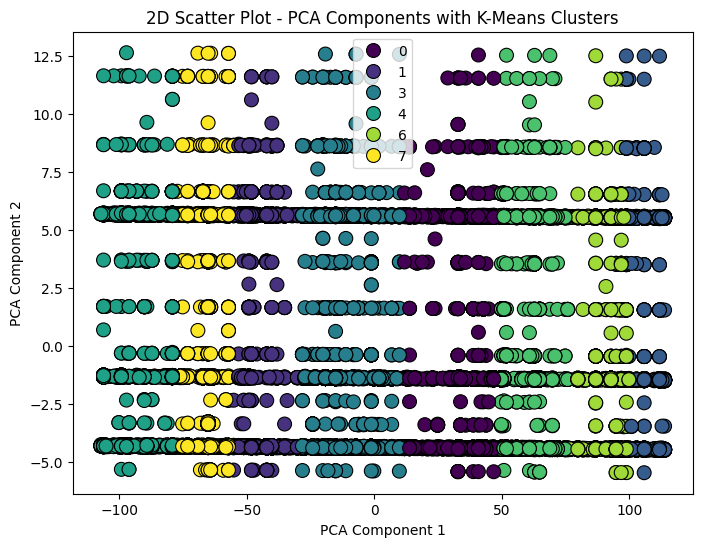

In [22]:
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot using the first 3 PCA components
# scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)

# # Add labels and title
# ax.set_title('PCA Components with K-Means Clusters')
# ax.set_xlabel('PCA1')
# ax.set_ylabel('PCA2')

# # Add a color bar to show clusters
# plt.colorbar(scatter)

# plt.show()



plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=cluster_labels, palette='viridis',  s=100, edgecolor='k')

plt.title('2D Scatter Plot - PCA Components with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Trying with 2 clusters as the target feature is 2 clusters and plotting upto 3 of the most influential features

In [23]:
km = KMeans(n_clusters=2)

km.fit(x)

KMeans(n_clusters=2)

In [24]:
labels = km.labels_
centers = km.cluster_centers_

In [25]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)

cluster_labels = km.labels_

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

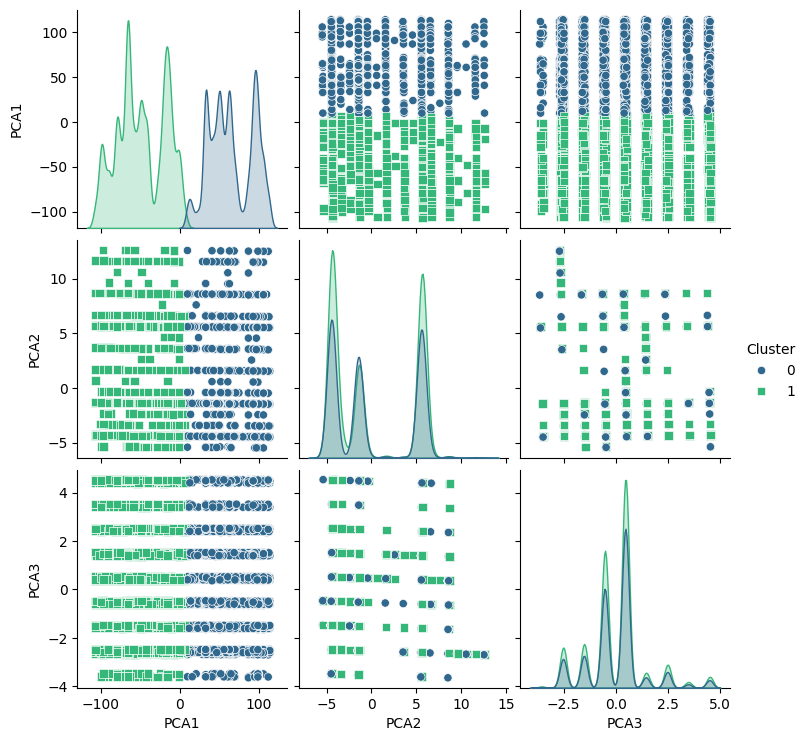

In [26]:
pca_df = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Cluster'] = cluster_labels


# Plot pairplot of the first 3 PCA components, colored by cluster labels
sns.pairplot(pca_df, hue='Cluster', diag_kind='kde', palette='viridis', markers=["o", "s", "D"]);

# Show the plot
plt.show()

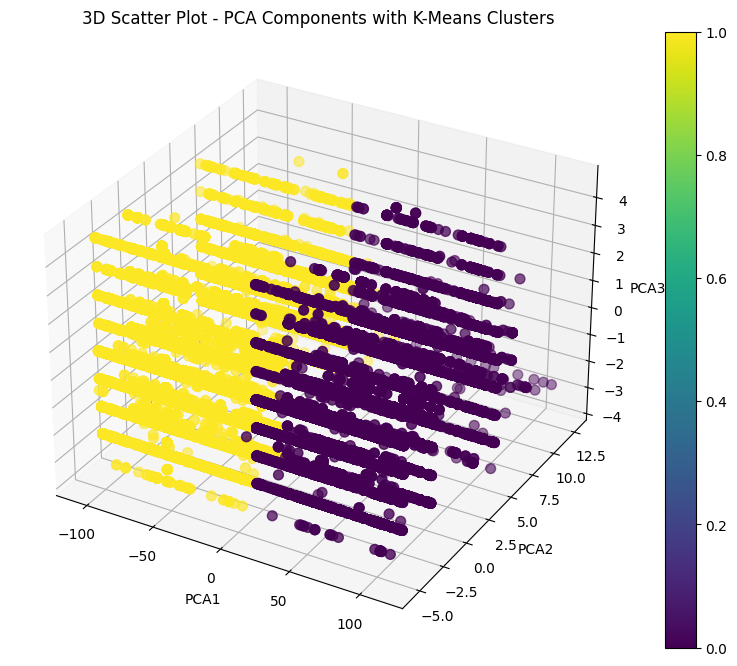

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first 3 PCA components
scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['Cluster'], cmap='viridis', s=50)

# Add labels and title
ax.set_title('3D Scatter Plot - PCA Components with K-Means Clusters')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a color bar to show clusters
plt.colorbar(scatter)

plt.show()

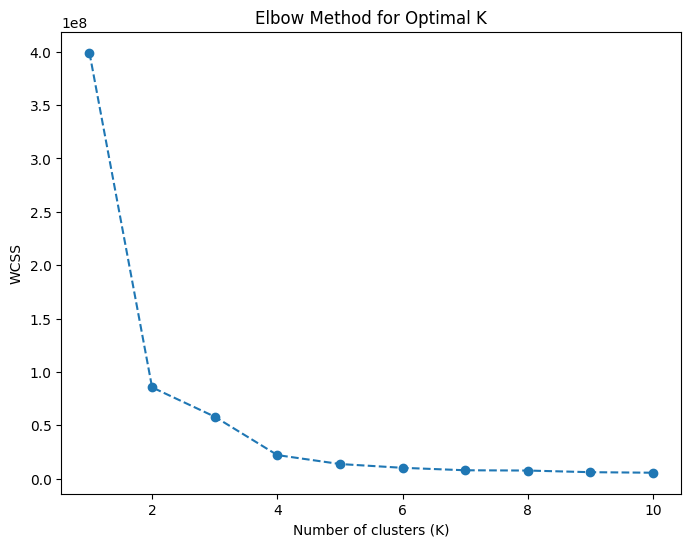

In [28]:
# Find the optimal K parameter
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Interpret the results
